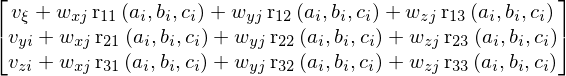

In [1]:
from sympy import *
from sympy.vector import CoordSys3D

# おまじない
init_printing()

# 相互作用の微分をどこまで自動化できるかを試す。
# ベクトルをベクトルのまま書ければいいのだが。
# まず、要素を全部書き並べる形で。

# com position of molecule i
v_i = Matrix(3,1,symbols('v_xi,v_yi,v_zi'))
# position of atom j in molecule i
w_j = Matrix(3,1,symbols('w_xj,w_yj,w_zj'))
# Rotation Matrix
r11 = Function('r11', real=True)
r12 = Function('r12', real=True)
r13 = Function('r13', real=True)
r21 = Function('r21', real=True)
r22 = Function('r22', real=True)
r23 = Function('r23', real=True)
r31 = Function('r31', real=True)
r32 = Function('r32', real=True)
r33 = Function('r33', real=True)

abc = symbols('a_i,b_i,c_i')
a_i, b_i,c_i = abc

R_i = Matrix(3,3,[r11(*abc),
                 r12(*abc),
                 r13(*abc),
                 r21(*abc),
                 r22(*abc),
                 r23(*abc),
                 r31(*abc),
                 r32(*abc),
                 r33(*abc)])

r_ij = v_i+R_i*w_j

r_ij

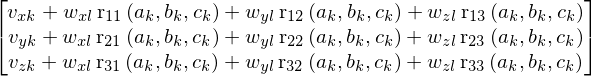

In [2]:
# com position of molecule k
v_k = Matrix(3,1,symbols('v_xk,v_yk,v_zk'))
# position of atom j in molecule i
w_l = Matrix(3,1,symbols('w_xl,w_yl,w_zl'))

a_k,b_k,c_k = symbols('a_k,b_k,c_k')

R_k = Matrix(3,3,[r11(a_k,b_k,c_k),
                 r12(a_k,b_k,c_k),
                 r13(a_k,b_k,c_k),
                 r21(a_k,b_k,c_k),
                 r22(a_k,b_k,c_k),
                 r23(a_k,b_k,c_k),
                 r31(a_k,b_k,c_k),
                 r32(a_k,b_k,c_k),
                 r33(a_k,b_k,c_k)])

r_kl = v_k+R_k*w_l
r_kl


$\phi$は原子原子間相互作用関数。

In [3]:
phi=Function('phi', real=True)

$\mathbf{r}=\mathbf{r}_{ij}-\mathbf{r}_{kl}$はプログラム中では`r_`と書き、その要素は`r_x`,`r_y`,`r_z`、大きさは$r$は`r`と書く。

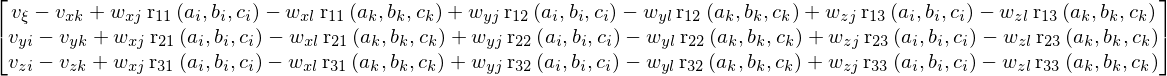

In [4]:
r_ = r_ij-r_kl
r_

In [5]:
r_2 = (r_.T*r_)[0]
r_2

`r`は今は定義しておくだけ。

In [6]:
r, r_x,r_y,r_z = symbols('r r_x r_y r_z')

## 一階微分
${d\phi(r)\over dr}$を`phi_r`のように書く。
### 並進

$\phi$を$x_i$で微分する。${\partial \phi\over \partial x_i}={\partial r\over\partial  x_i}\cdot{\partial \phi\over \partial r}={\partial \left|\mathbf{r}\right|\over \partial x_i}\cdot{\partial \phi\over \partial r}$

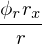

In [18]:
# vxiで微分する
phi_r, phi_rr = symbols('phi_r, phi_rr')
D = diff(sqrt(r_2), v_i[0]) * phi_r
D = D.subs(r_[0], 'r_x').subs(r_[1],'r_y').subs(r_[2],'r_z')
D = D.subs((r_x**2+r_y**2+r_z**2)**0.5,r)
dxi = D
D

In [20]:
print(python(D))

phi_r = Symbol('phi_r')
r_x = Symbol('r_x')
r = Symbol('r')
e = phi_r*r_x/r


### 回転
${\partial \mathbf{R}_i\over \partial a_i}\cdot \mathbf{w}_j$を$\mathbf{s}_a$と書く。

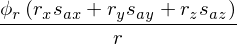

In [8]:
# rをaiで微分する
D = diff(sqrt(r_2), a_i) * phi_r
D = D.subs(r_[0], 'r_x').subs(r_[1],'r_y').subs(r_[2],'r_z')
D = D.simplify()
D = D.subs((diff(R_i,a_i)*w_j)[0], 's_ax').subs((diff(R_i,a_i)*w_j)[1], 's_ay').subs((diff(R_i,a_i)*w_j)[2], 's_az')
D = D.subs(sqrt(r_x**2+r_y**2+r_z**2),r)
dai = D
D

$$\phi_r\cdot {\mathbf{r}\over r}\cdot\mathbf{s}_a$$

## 二階微分
### 並進・並進
#### 同一変数

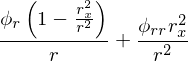

In [9]:
D = diff(sqrt(r_2), v_i[0],v_i[0]) * phi_r + diff(sqrt(r_2), v_i[0]) * diff(sqrt(r_2), v_i[0]) * phi_rr
#dxixi = dxixi.simplify()
D = D.subs(r_[0], 'r_x').subs(r_[1],'r_y').subs(r_[2],'r_z')
D = D.subs(sqrt(r_x**2+r_y**2+r_z**2),r)
dxixi = D
D

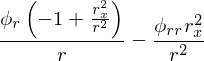

In [21]:
# 同一変数、異なる分子
D = diff(sqrt(r_2), v_i[0],v_k[0]) * phi_r + diff(sqrt(r_2), v_i[0]) * diff(sqrt(r_2), v_k[0]) * phi_rr
#dxixi = dxixi.simplify()
D = D.subs(r_[0], 'r_x').subs(r_[1],'r_y').subs(r_[2],'r_z')
D = D.subs(sqrt(r_x**2+r_y**2+r_z**2),r)
dxixk = D
D

#### 異なる変数、同じ分子

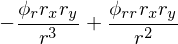

In [10]:
D = diff(sqrt(r_2), v_i[0],v_i[1]) * phi_r + diff(sqrt(r_2), v_i[0]) * diff(sqrt(r_2), v_i[1]) * phi_rr
D = D.subs(r_[0], 'r_x').subs(r_[1],'r_y').subs(r_[2],'r_z')
D = D.subs(sqrt(r_x**2+r_y**2+r_z**2),r)
dxiyi = D
D

#### 異なる分子

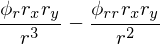

In [11]:
D = diff(sqrt(r_2), v_i[0],v_k[1]) * phi_r + diff(sqrt(r_2), v_i[0]) * diff(sqrt(r_2), v_k[1]) * phi_rr
D = D.subs(r_[0], 'r_x').subs(r_[1],'r_y').subs(r_[2],'r_z')
D = D.subs(sqrt(r_x**2+r_y**2+r_z**2),r)
dxiyk =D
D

### 回転・回転

#### 同じ変数

${\partial^2 \mathbf{R}_i\over \partial a_i^2}\cdot \mathbf{w}_j$を$\mathbf{s}_{aa}$と書く。

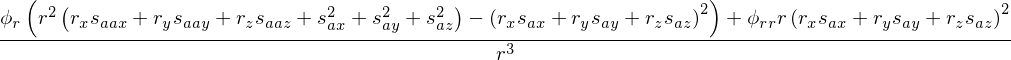

In [12]:
# aiで再度微分
D = diff(sqrt(r_2), a_i, a_i) * phi_r + diff(sqrt(r_2), a_i) * diff(sqrt(r_2), a_i) * phi_rr
D = D.subs(r_[0], 'r_x').subs(r_[1],'r_y').subs(r_[2],'r_z')
D = D.subs(sqrt(r_x**2+r_y**2+r_z**2),r)
D = D.simplify()
D = D.subs((diff(R_i,a_i)*w_j)[0], 's_ax').subs((diff(R_i,a_i)*w_j)[1], 's_ay').subs((diff(R_i,a_i)*w_j)[2], 's_az')
D = D.subs((diff(R_i,a_i,a_i)*w_j)[0], 's_aax').subs((diff(R_i,a_i,a_i)*w_j)[1], 's_aay').subs((diff(R_i,a_i,a_i)*w_j)[2], 's_aaz')
daiai = D
D

$${\left({{d^2\over dr^2}\phi (r)\over r} - {{d\over dr}\phi(r)\over r^2}\right)\cdot (\mathbf{r}\cdot \mathbf{s}_a)^2+(\mathbf{r}\cdot \mathbf{s}_{aa}+\mathbf{s}_a^2)\cdot {d\over dr}\phi(r)}\over r$$


#### 同じ分子、別変数

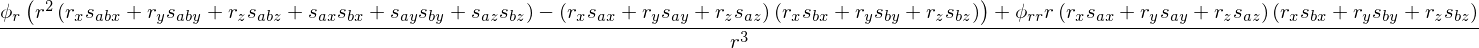

In [13]:
D = diff(sqrt(r_2), a_i, b_i) * phi_r + diff(sqrt(r_2), a_i) * diff(sqrt(r_2), b_i) * phi_rr
D = D.subs(r_[0], 'r_x').subs(r_[1],'r_y').subs(r_[2],'r_z')
D = D.subs(sqrt(r_x**2+r_y**2+r_z**2),r)
D = D.simplify()
D = D.subs((diff(R_i,a_i)*w_j)[0], 's_ax').subs((diff(R_i,a_i)*w_j)[1], 's_ay').subs((diff(R_i,a_i)*w_j)[2], 's_az')
D = D.subs((diff(R_i,b_i)*w_j)[0], 's_bx').subs((diff(R_i,b_i)*w_j)[1], 's_by').subs((diff(R_i,b_i)*w_j)[2], 's_bz')
D = D.subs((diff(R_i,a_i,b_i)*w_j)[0], 's_abx').subs((diff(R_i,a_i,b_i)*w_j)[1], 's_aby').subs((diff(R_i,a_i,b_i)*w_j)[2], 's_abz')
daibi = D
D

#### 別の分子

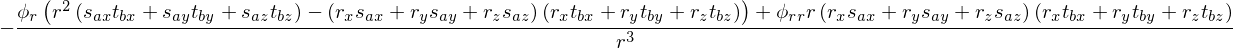

In [14]:
D = diff(sqrt(r_2), a_i, b_k) * phi_r + diff(sqrt(r_2), a_i) * diff(sqrt(r_2), b_k) * phi_rr
D = D.subs(r_[0], 'r_x').subs(r_[1],'r_y').subs(r_[2],'r_z')
D = D.subs(sqrt(r_x**2+r_y**2+r_z**2),r)
D = D.simplify()
D = D.subs((diff(R_i,a_i)*w_j)[0], 's_ax').subs((diff(R_i,a_i)*w_j)[1], 's_ay').subs((diff(R_i,a_i)*w_j)[2], 's_az')
D = D.subs((diff(R_k,b_k)*w_l)[0], 't_bx').subs((diff(R_k,b_k)*w_l)[1], 't_by').subs((diff(R_k,b_k)*w_l)[2], 't_bz')
daibk = D
D

### 回転・並進

#### 同じ分子

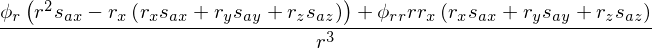

In [15]:
# vxiで再度微分
D = diff(sqrt(r_2), a_i, v_i[0]) * phi_r + diff(sqrt(r_2), a_i) * diff(sqrt(r_2), v_i[0]) * phi_rr
D = D.subs(r_[0], 'r_x').subs(r_[1],'r_y').subs(r_[2],'r_z')
D = D.subs(sqrt(r_x**2+r_y**2+r_z**2),r)
D = D.simplify()
D = D.subs((diff(R_i,a_i)*w_j)[0], 's_ax').subs((diff(R_i,a_i)*w_j)[1], 's_ay').subs((diff(R_i,a_i)*w_j)[2], 's_az')
dxiai = D
D

#### 別の分子

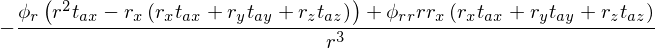

In [16]:
# vxiで再度微分
D = diff(sqrt(r_2), a_k, v_i[0]) * phi_r + diff(sqrt(r_2), a_k) * diff(sqrt(r_2), v_i[0]) * phi_rr
D = D.subs(r_[0], 'r_x').subs(r_[1],'r_y').subs(r_[2],'r_z')
D = D.subs(sqrt(r_x**2+r_y**2+r_z**2),r)
D = D.simplify()
D = D.subs((diff(R_k,a_k)*w_l)[0], 't_ax').subs((diff(R_k,a_k)*w_l)[1], 't_ay').subs((diff(R_k,a_k)*w_l)[2], 't_az')
dxiak = D
D

In [17]:
from sympy.utilities.codegen import codegen
result = codegen([('dxixi', dxixi),
                  ('dxiyi', dxiyi),
                  ('dxiyk', dxiyk),
                  ('daiai', daiai),
                  ('daibi', daibi),
                  ('daibk', daibk),
                  ('dxiai', dxiai),
                  ('dxiak', dxiak)],
                 prefix='Derivative',
                 language='f95',
                 project='NMA',
                 to_files=False)
print(result[0][1])

!******************************************************************************
!*                       Code generated with sympy 1.3                        *
!*                                                                            *
!*              See http://www.sympy.org/ for more information.               *
!*                                                                            *
!*                         This file is part of 'NMA'                         *
!******************************************************************************

REAL*8 function dxixi(phi_r, phi_rr, r, r_x)
implicit none
REAL*8, intent(in) :: phi_r
REAL*8, intent(in) :: phi_rr
REAL*8, intent(in) :: r
REAL*8, intent(in) :: r_x

dxixi = phi_r*(1 - r_x**2/r**2)/r + phi_rr*r_x**2/r**2

end function

REAL*8 function dxiyi(phi_r, phi_rr, r, r_x, r_y)
implicit none
REAL*8, intent(in) :: phi_r
REAL*8, intent(in) :: phi_rr
REAL*8, intent(in) :: r
REAL*8, intent(in) :: r_x
REAL*8, intent(in) :: r_y

dxiy

このコード自体はなかなかいいぞ。何しろ書き写しそこねる心配がない。

## 切断関数
切断(truncation)関数は通常の相互作用に掛ける形で作用する。
$$\phi'(r) = \phi(r)\cdot T(r_{ij})$$
ただし、$r_{ij}$は重心間距離であって、原子間距離$r$とは別もの。

これを原子間距離で微分すると付加項が生じるはず。

実は、Hessianの計算で欲しいのは、$r$での微分ではなく$r_i$での微分なので、$T$は計算がしやすいはず。どうしようかな。

一つの考え方として、$\phi'$を使わずに展開を試みる。
## 一階微分・並進



In [20]:
# vxiで微分する
T = Function('T', real=True)
T_v, T_vv = symbols('T_v, T_vv')
phi_r, phi_rr = symbols('phi_r, phi_rr')
v_ = v_i - v_k
v_2 = (v_.T*v_)[0]
v_2

In [24]:
v, v_x,v_y,v_z = symbols('v v_x v_y v_z')

In [25]:
# Dは(phi T)をr_iで微分したもの。
# つまり、((phiをr_iで微分したもの) *T) + (phi * (Tをr_iで微分したもの)) 後者を付加項と呼ぶ。
D = diff(sqrt(r_2), v_i[0]) * phi_r   
Dsup =  phi(r) * diff(sqrt(v_2), v_i[0]) * T_v #付加項
Dsup = Dsup.subs(v_[0], 'v_x').subs(v_[1],'v_y').subs(v_[2],'v_z')
Dsup = Dsup.subs((v_x**2+v_y**2+v_z**2)**0.5,'v')
#dxi = D
Dsup


おそらくこうするしかないのだろう。とすると、ここまで書いてきた関数をすべて書きなおすことになる!! 別紙に移動。